In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[[250 252 251]
  [250 253 251]
  [251 253 252]
  ...
  [254 254 254]
  [251 251 251]
  [255 253 255]]

 [[253 255 254]
  [246 249 248]
  [253 255 254]
  ...
  [252 254 253]
  [252 252 252]
  [255 253 255]]

 [[250 252 253]
  [250 252 253]
  [247 249 250]
  ...
  [245 248 246]
  [255 255 255]
  [255 253 255]]

 ...

 [[249 251 251]
  [252 251 251]
  [254 251 251]
  ...
  [242 247 245]
  [253 255 254]
  [254 255 253]]

 [[248 250 250]
  [255 255 255]
  [255 255 255]
  ...
  [247 252 251]
  [249 252 251]
  [254 255 253]]

 [[255 255 255]
  [253 253 253]
  [255 255 255]
  ...
  [253 255 254]
  [252 253 252]
  [254 255 253]]]


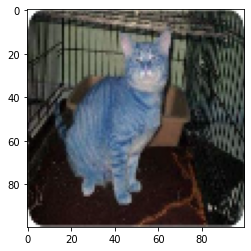

In [4]:
datadrive = "/content/gdrive/MyDrive/Data AI Final"
phanloai=['American Curl','Bengal','Birman','British Longhair',
                 'British Shorthair', 'Maine Coon', 'Munchkin','Persian','Ragdoll','Russian Blue',
          'Scottish Fold','Siamese','Siberian','Sphynx', 'Tabby']
img_size=100
for doituong in phanloai:
  path=os.path.join(datadrive,doituong)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_COLOR) 
    new_array = cv.resize(img_array,(img_size,img_size)) 
    print(new_array)
    plt.imshow(new_array,cmap='gist_rainbow')
    plt.show()
    break
  break

In [5]:
#creating training data
training_data=[]
def create_traning_data():

  for doituong in phanloai:
    path = os.path.join(datadrive,doituong)
    class_num = phanloai.index(doituong)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 3012/3012 [00:47<00:00, 63.92it/s] 

22113


In [6]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (22113, 100, 100, 1)
y (22113,)


In [7]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/gdrive/MyDrive/Data AI Final/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/gdrive/MyDrive/Data AI Final/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [8]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [9]:
pickle_in = open("/content/gdrive/MyDrive/Data AI Final/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/gdrive/MyDrive/Data AI Final/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0 
print('X',X.shape)
print('y',y.shape) 

X (22113, 100, 100, 1)
y (22113,)


In [10]:
y= to_categorical(y,15)

In [11]:
X.shape


(22113, 100, 100, 1)

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(15,activation='softmax'))


In [13]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/100
311/311 [==============================] - 32s 62ms/step - loss: 2.1756 - accuracy: 0.2637 - val_loss: 2.7135 - val_accuracy: 0.0000e+00
Epoch 2/100
311/311 [==============================] - 18s 58ms/step - loss: 1.9284 - accuracy: 0.3571 - val_loss: 2.7957 - val_accuracy: 0.0032
Epoch 3/100
311/311 [==============================] - 18s 59ms/step - loss: 1.7672 - accuracy: 0.4172 - val_loss: 3.4031 - val_accuracy: 4.5208e-04
Epoch 4/100
311/311 [==============================] - 19s 60ms/step - loss: 1.6040 - accuracy: 0.4757 - val_loss: 3.3429 - val_accuracy: 0.0081
Epoch 5/100
311/311 [==============================] - 19s 61ms/step - loss: 1.4159 - accuracy: 0.5337 - val_loss: 3.4960 - val_accuracy: 0.0131
Epoch 6/100
311/311 [==============================] - 19s 62ms/step - loss: 1.1389 - accuracy: 0.6246 - val_loss: 3.9530 - val_accuracy: 0.0339
Epoch 7/100
311/311 [==============================] - 20s 63ms/step - loss: 0.8153 - accuracy: 0.7286 - val_loss: 4.0906 

In [15]:
model.save('nhandien15loaimeo-TranDinhTrong.h5')

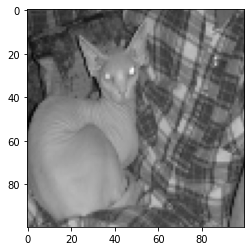

In [17]:
img_test='/content/gdrive/MyDrive/Data AI Final/Sphynx/18375601_297.jpg'
phanloai=['American Curl','Bengal','Birman','British Longhair',
                 'British Shorthair', 'Maine Coon', 'Munchkin','Persian','Ragdoll','Russian Blue',
          'Scottish Fold','Siamese','Siberian','Sphynx', 'Tabby']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

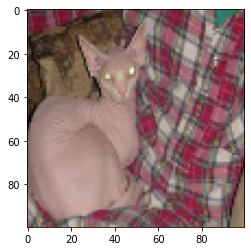

Prediction value: Sphynx


In [18]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value:',phanloai[int(np.argmax(prediction))])